In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
import glob

In [4]:
path = "/content/drive/MyDrive/Data Science Journey/Final Thesis/model data"
all_files = glob.glob(path + "/*.xlsx")
all_files

['/content/drive/MyDrive/Data Science Journey/Final Thesis/model data/TRANSIT 2021 (1).xlsx',
 '/content/drive/MyDrive/Data Science Journey/Final Thesis/model data/DIRECT 2022.xlsx',
 '/content/drive/MyDrive/Data Science Journey/Final Thesis/model data/TS 2022.xlsx']

In [5]:
sm = []
for filename in all_files:
  collection = pd.read_excel(filename, header = 1, index_col = None)
  sm.append(collection)

In [6]:
collection = pd.concat(sm)
collection.shape

(63222, 87)

In [7]:
df = collection[['Trade', 'Loop', 'DG', 'RF', 'OOG', 'Load ETD', 'Booking Date',
       '20DC', '40DC', '40HQ', '45HQ', '20RF', '40RQ', '20FO', '40FO', '20FC',
       '40FC', 'TTL Teus', 'TTL Weight', 'MC Status', 'TTL USD Amount', 'TH PP Currency', 'TH PP Amount', 'TH CC Currency',
       'TH CC Amount', 'DF PP Currency', 'DF PP Amount', 'DF CC Currency',
       'DF CC Amount', 'Revenue', 'MC', 'MC per TEU', 'Released Teus', 'TTL Weight.1']]

In [8]:
df.head()

,Trade,Loop,DG,RF,OOG,Load ETD,Booking Date,20DC,40DC,40HQ,...,TH CC Amount,DF PP Currency,DF PP Amount,DF CC Currency,DF CC Amount,Revenue,MC,MC per TEU,Released Teus,TTL Weight.1
0,IAPS,SE8,NaN,NaN,NaN,2021-11-13 14:30:00,2021-10-28 11:52:06,5.0,0.0,0.0,...,2365.0,VND,950000.0,MYR,210.0,2206.08,1678.23,335.65,5,111430.0
1,IAPS,SE8,NaN,NaN,NaN,2021-11-13 14:30:00,2021-10-28 11:54:57,1.0,0.0,0.0,...,95.0,VND,950000.0,IDR,100000.0,712.23,454.97,454.97,1,3024.0
2,IAPS,SE8,NaN,NaN,NaN,2021-11-13 14:30:00,2021-10-28 14:24:53,2.0,0.0,0.0,...,NaN,VND,950000.0,IDR,100000.0,1435.66,769.56,384.78,2,48790.0
3,IAPS,SE8,NaN,NaN,NaN,2021-11-13 14:30:00,2021-10-28 14:43:34,4.0,0.0,0.0,...,600.0,VND,950000.0,USD,65.0,3900.45,1673.45,418.36,4,64000.0
4,TPEB,SE8,NaN,NaN,NaN,2021-11-13 14:30:00,2021-10-28 14:37:32,0.0,0.0,2.0,...,NaN,VND,950000.0,NaN,NaN,31686.37,28272.90,7068.23,2,47840.0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63222 entries, 0 to 29520
Data columns (total 34 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Trade           63222 non-null  object        
 1   Loop            63027 non-null  object        
 2   DG              329 non-null    object        
 3   RF              203 non-null    object        
 4   OOG             60 non-null     object        
 5   Load ETD        63222 non-null  datetime64[ns]
 6   Booking Date    63222 non-null  datetime64[ns]
 7   20DC            63221 non-null  float64       
 8   40DC            63221 non-null  float64       
 9   40HQ            63221 non-null  float64       
 10  45HQ            33700 non-null  float64       
 11  20RF            33707 non-null  float64       
 12  40RQ            33801 non-null  float64       
 13  20FO            33706 non-null  float64       
 14  40FO            33707 non-null  float64       
 15  20

In [10]:
df.shape

(63222, 34)

In [11]:
df.isna().sum()

Trade                 0
Loop                195
DG                62893
RF                63019
OOG               63162
Load ETD              0
Booking Date          0
20DC                  1
40DC                  1
40HQ                  1
45HQ              29522
20RF              29515
40RQ              29421
20FO              29516
40FO              29515
20FC              29504
40FC              29516
TTL Teus              0
TTL Weight            0
MC Status            11
TTL USD Amount      928
TH PP Currency    25054
TH PP Amount      25054
TH CC Currency    23230
TH CC Amount      23230
DF PP Currency     8313
DF PP Amount       8313
DF CC Currency    41399
DF CC Amount      41399
Revenue             741
MC                 2369
MC per TEU         2369
Released Teus         0
TTL Weight.1          0
dtype: int64

In [12]:
# Drop Nan in Revenue
df = df.dropna(subset = ['TTL USD Amount'])
df = df.dropna(subset = ['MC Status', 'Revenue'])

In [13]:
df = df.sort_values(by=['Booking Date', 'Load ETD'])
df = df.reset_index(drop=True)
df.head()

,Trade,Loop,DG,RF,OOG,Load ETD,Booking Date,20DC,40DC,40HQ,...,TH CC Amount,DF PP Currency,DF PP Amount,DF CC Currency,DF CC Amount,Revenue,MC,MC per TEU,Released Teus,TTL Weight.1
0,IAPS,TSE,NaN,NaN,NaN,2021-01-07 10:30:00,2020-10-12 10:42:18,1.0,0.0,0.0,...,5600.0,NaN,NaN,TWD,1800.0,368.75,181.01,181.01,1,4444.58
1,TPEB,SE8,NaN,NaN,NaN,2021-01-14 08:30:00,2020-10-22 16:52:48,0.0,0.0,2.0,...,NaN,VND,900000.0,NaN,NaN,8297.66,3920.35,980.09,2,33100.52
2,TPEB,SE8,NaN,NaN,NaN,2021-01-14 08:30:00,2020-10-28 14:16:46,0.0,0.0,1.0,...,NaN,VND,900000.0,NaN,NaN,4828.30,3778.20,1889.10,1,16650.00
3,TPEB,SE8,NaN,NaN,NaN,2021-01-14 08:30:00,2020-11-09 14:56:26,0.0,1.0,0.0,...,NaN,VND,900000.0,NaN,NaN,4973.29,3851.14,1925.57,1,23682.16
4,MEDW,SE8,NaN,NaN,NaN,2021-01-14 08:30:00,2020-11-09 15:02:19,1.0,0.0,0.0,...,180.0,VND,900000.0,NaN,NaN,2003.23,1452.54,1452.54,1,12118.00


In [14]:
set(df['Trade'])

{'ASCA',
 'AUSS',
 'ESAW',
 'IAPS',
 'IRAW',
 'MEDW',
 'NCPW',
 'RASW',
 'SARA',
 'TPEB',
 'WSAE'}

- Models used: Multiple Linear Regression, Random Forest, XGBoost & Deep Neural Network 

- Performance metrics: MSE, MAE, Adjusted R^2

In [15]:
## Set up environment

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

# Import algorithms:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.neural_network import MLPRegressor

# Import metrics:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


Test Target: "Freight Rate"

In [16]:
# Split df into X & y
X = df.drop("TTL USD Amount", axis = 1)
y = df["TTL USD Amount"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, shuffle=False)

categorical_feature = ['Loop', 'Trade', 'MC Status']
categorical_transformer = Pipeline(steps = [
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ("onehot", OneHotEncoder(handle_unknown = 'ignore'))]) 

freight_features = ['DG', 'RF', 'OOG'] # categorical
freight_transformer = Pipeline(steps = [
    ('imputer', SimpleImputer(strategy="constant", fill_value='N')),
    ("onehot", OneHotEncoder(handle_unknown = 'ignore'))
])

quantity_features = ['20DC',
      '40DC', '40HQ', '45HQ', '20RF', '40RQ', '20FO', '40FO', '20FC', '40FC',
      'Revenue', 'TH PP Amount', 'TH CC Amount', 'DF PP Amount', 'DF CC Amount', 'MC', 'MC per TEU']
quantity_transformer = Pipeline(steps = [
    ("imputer", SimpleImputer(strategy="constant", fill_value= 0))
])

currency_features = ['TH PP Currency', 'TH CC Currency', 'DF PP Currency', 'DF CC Currency']
currency_transformer = Pipeline(steps = [
    ("imputer", SimpleImputer(strategy = "constant", fill_value = "None")),
    ("onehot", OneHotEncoder(handle_unknown = 'ignore'))
])

# Preprocessor
preprocessor = ColumnTransformer(transformers=[("cat", categorical_transformer, categorical_feature), ("freight", freight_transformer, freight_features),
                                               ("quant", quantity_transformer, quantity_features), ("curr", currency_transformer, currency_features)])

In [17]:
model_rf=Pipeline(steps=[("preprocessor", preprocessor),
                      ("model", RandomForestRegressor())])

model_rf.fit(X_train,y_train)
test_score_rf = model_rf.score(X_test, y_test)
y_preds_rf = model_rf.predict(X_test)
# csv_rf = cross_val_score(model_rf, X_train, y_train, cv =5)

test_score_rf, mean_absolute_error(y_test, y_preds_rf), mean_squared_error(y_test, y_preds_rf)

(0.99926259518981, 110.87112510587353, 114369.27196295204)

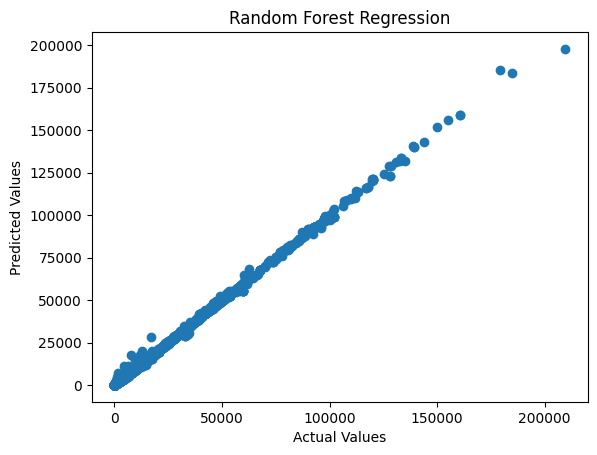

In [18]:
plt.scatter(y_test, y_preds_rf)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Random Forest Regression')
plt.show()

In [19]:
# Linear Regression 
model_ln=Pipeline(steps=[("preprocessor", preprocessor),
                      ("model", LinearRegression())])

model_ln.fit(X_train,y_train)
test_score_ln = model_ln.score(X_test, y_test)
y_preds_ln = model_ln.predict(X_test)
# csv_ln = cross_val_score(model_ln, X_train, y_train, cv =5)

test_score_ln, mean_absolute_error(y_test, y_preds_ln), mean_squared_error(y_test, y_preds_ln)

(0.9273231447151462, 154.17621833392676, 11271962.038521482)

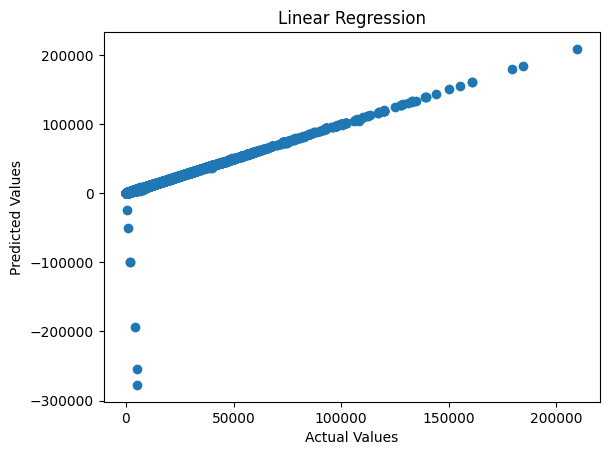

In [20]:
plt.scatter(y_test, y_preds_ln)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Linear Regression')
plt.show()

In [21]:
# XGB
model_xgb=Pipeline(steps=[("preprocessor", preprocessor),
                      ("model", xgb.XGBRegressor())])

model_xgb.fit(X_train,y_train)
test_score_xgb = model_xgb.score(X_test, y_test)
y_preds_xgb = model_xgb.predict(X_test)
# csv_xgb = cross_val_score(model_xgb, X_train, y_train, cv =5)

test_score_xgb, mean_absolute_error(y_test, y_preds_xgb), mean_squared_error(y_test, y_preds_xgb)

(0.999536129526368, 117.52092713764314, 71944.91766433525)

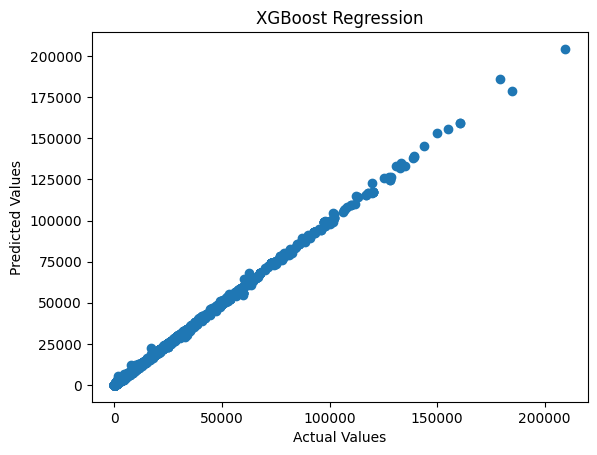

In [22]:
plt.scatter(y_test, y_preds_xgb)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('XGBoost Regression')
plt.show()

In [23]:
# MLP
model_mlp=Pipeline(steps=[("preprocessor", preprocessor),
                      ("model", MLPRegressor(hidden_layer_sizes=(20,), max_iter=1000))])

model_mlp.fit(X_train,y_train)
test_score_mlp = model_mlp.score(X_test, y_test)
y_preds_mlp = model_mlp.predict(X_test)
# csv_mlp = cross_val_score(model_mlp, X_train, y_train, cv =5)

test_score_mlp, mean_absolute_error(y_test, y_preds_mlp), mean_squared_error(y_test, y_preds_mlp)

(0.9986720410502408, 240.1915273481229, 205962.44583961755)

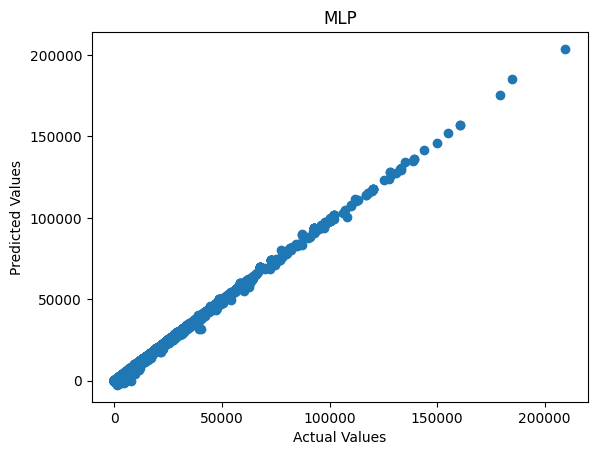

In [24]:
plt.scatter(y_test, y_preds_mlp)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('MLP')
plt.show()

In [31]:
model_scores = {'Linear Regression':[0.927, 154.17, 11271962.03],
                'Random Forest Regression': [0.999, 110.87, 114369.27],
                'MLP': [0.998, 240.19, 205962.44],
                'XGBoost': [0.999, 117.52, 71944.91]}

result = pd.DataFrame(model_scores, index=['R2_score', 'MAE', 'MSE'])
result = result.T
result.index.name = 'Model'
result

,R2_score,MAE,MSE
Model,,,
Linear Regression,0.927,154.17,11271962.03
Random Forest Regression,0.999,110.87,114369.27
MLP,0.998,240.19,205962.44
XGBoost,0.999,117.52,71944.91


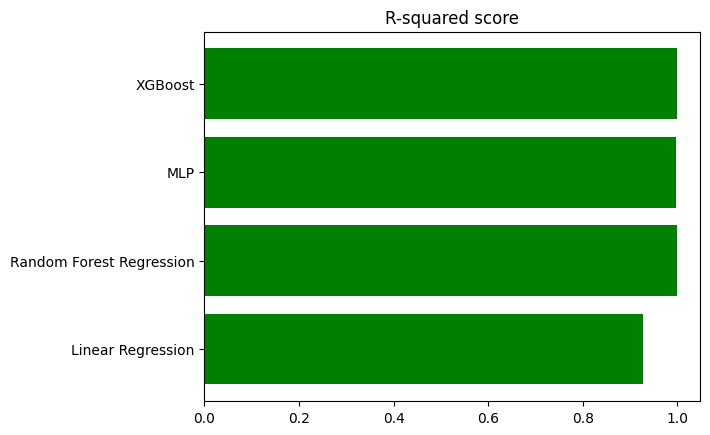

In [35]:
plt.barh(result.index, result['R2_score'], color = 'green')
plt.title('R-squared score')
plt.show()

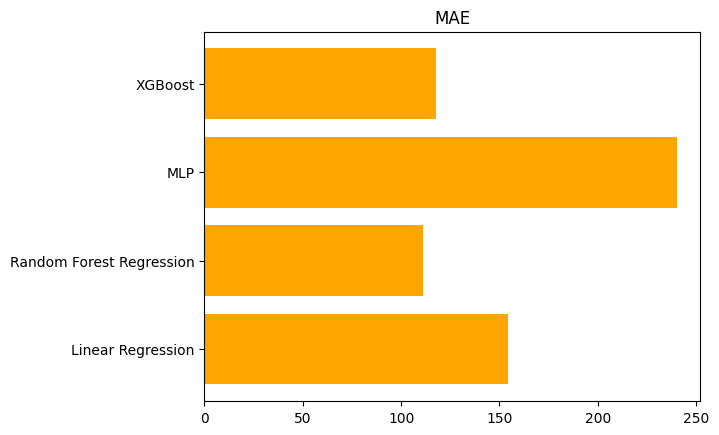

In [36]:
plt.barh(result.index, result['MAE'], color = 'orange')
plt.title('MAE')
plt.show()

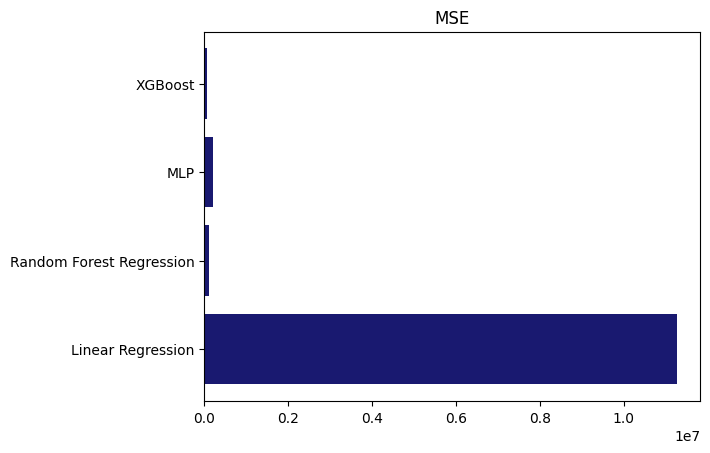

In [37]:
plt.barh(result.index, result['MSE'], color = '#191970')
plt.title('MSE')
plt.show()